# Nonparametric regression

We'll solve the problem of regression in a few different ways:

- KNN
- Decision tree regression
- Random forest regression
- Gradient boosted trees
- Symbolic regression with genetic programming

---

## Load some data

We'll use our 'rocks' data:

In [48]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/scienxlab/datasets/refs/heads/main/rpc/rpc-4-lithologies.csv')

df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,104818,KIAMICHI FORMA. 4,sandstone,3045.6,1595.7,2108.0
1,104893,KIAMICHI REMOLD 3,sandstone,3000.6,1517.1,2126.0
2,104652,NAVAJO ARCO 2,sandstone,3363.6,2041.5,2162.0
3,104752,NAVAJO ARCO REMOL 1,sandstone,3195.3,1606.2,2160.0
4,104598,FERRON 82-3 1677.5,sandstone,4237.5,2448.6,2428.0


Let's try to predict `Vs` from `Vp`. Later, you can try adding `Rho_n` as another feature to see how you can use these algorithms on multivariate data.

In [49]:
data = df[['Vp', 'Vs']].values

<h3>Random data</h3>

<p>If you prefer, you can make a dataset from a multivariate normal distribution, so we can control the statistics of the features and target.</p>

<b>To do this, run the following code:</b>

<pre>
import numpy as np

num_samples = 100

# The desired mean values of the sample.
mu = np.array([5.0, 5.0, 10.0])

# The desired covariance matrix.
r = np.array([
        [  2.00,  0.00, -2.00],
        [  0.00,  2.00,  2.00],
        [ -2.00,  2.00,  4.00]
    ])

# Generate the random samples.
data = np.random.multivariate_normal(mu, r, size=num_samples)
</pre>

## Make `X` and `y`

We can visualize the data:

<Axes: xlabel='x', ylabel='y'>

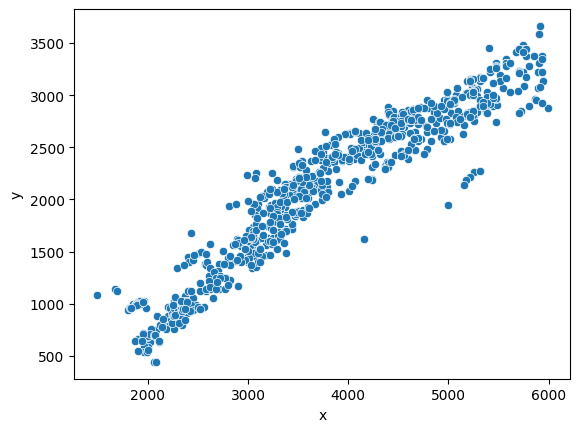

In [50]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data, columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y')

In [51]:
# Univariate case
X = data[:, 0:1]
y = data[:, 1]

print(X.shape, y.shape)

(800, 1) (800,)


In the multivariate case, we should always standardize the data; in the univariate case, there's usually no need, but in my experience, gradient descent does not perform well on unscaled data, so let's standardize first.

In [52]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

We need these for plots:

In [53]:
import matplotlib.pyplot as plt
import numpy as np

X_plt = np.arange(-3, 3, 0.1).reshape(-1, 1)
y_plt_manual = None

## KNN

We can use the simplest non-parametric model: K-nearest neighbours. There is no model, we just remember all the data then look up neighbours at prediction time.

In [54]:
from sklearn.neighbors import KNeighborsRegressor

est = KNeighborsRegressor()
est.fit(X, y)
y_pred = est.predict(X)

There are no parameters but we can compare the estimate with the data:

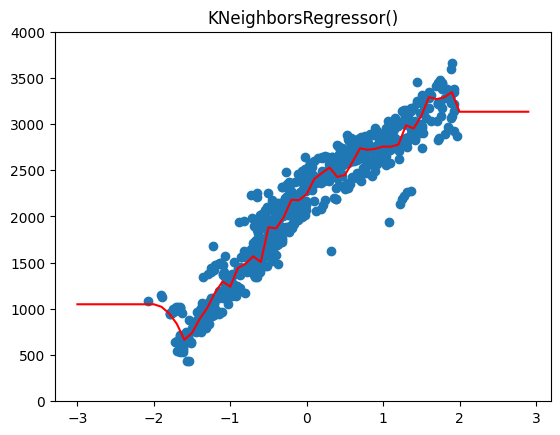

In [55]:
y_plt = est.predict(X_plt)

plt.scatter(X[:, 0], y) 
plt.plot(X_plt, y_plt, color='r')
plt.ylim(0, 4000)
plt.title(str(est))
plt.show()

In [56]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(root_mean_squared_error(y, y_pred), r2_score(y, y_pred))

161.3190126840931 0.9537253676863859


## Decision tree

Let's check a tree.

In [57]:
from sklearn.tree import DecisionTreeRegressor

est = DecisionTreeRegressor()
est.fit(X, y)
y_pred = est.predict(X)

There are no parameters but we can compare the estimate with the data:

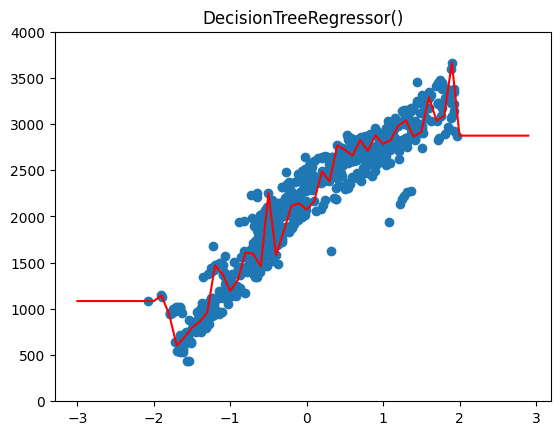

In [58]:
y_plt = est.predict(X_plt)

plt.scatter(X[:, 0], y) 
plt.plot(X_plt, y_plt, color='r')
plt.ylim(0, 4000)
plt.title(str(est))
plt.show()

In [59]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(root_mean_squared_error(y, y_pred), r2_score(y, y_pred))

68.18998862256703 0.9917317594738766


## Random forest

Let's check a forest.

In [60]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X, y)
y_pred = est.predict(X)

There are no parameters but we can compare the estimate with the data:

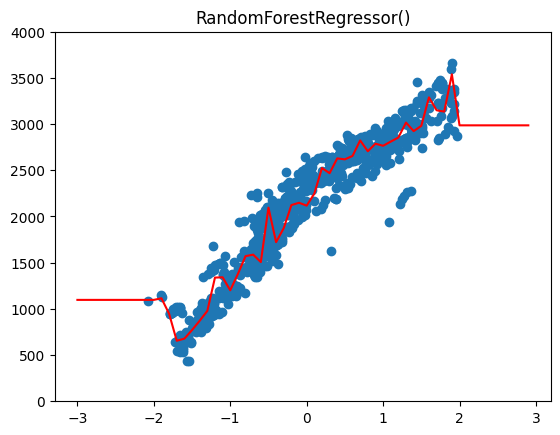

In [61]:
y_plt = est.predict(X_plt)

plt.scatter(X[:, 0], y) 
plt.plot(X_plt, y_plt, color='r')
plt.ylim(0, 4000)
plt.title(str(est))
plt.show()

In [62]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(root_mean_squared_error(y, y_pred), r2_score(y, y_pred))

98.68523801851431 0.9826828566583068


## Symbolic regression

We'll use genetic programming.

In [63]:
from gplearn.genetic import SymbolicRegressor

sr = SymbolicRegressor(population_size=1000,
                       generations=20,
                       tournament_size=20,
                       stopping_criteria=0.01,
                       # parsimony_coefficient=0.1,
                       p_crossover=0.7,
                       p_subtree_mutation=0.2,
                       metric="mean absolute error",
                       function_set=('add', 'mul', 'div'),
                       random_state=42)

sr.fit(X, y)

print("Discovered equation:", sr._program)

/Users/MTHA/dev/chrestomathy/.venv/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Discovered equation: add(mul(div(mul(div(div(X0, 0.738), mul(mul(X0, -0.108), div(add(0.282, X0), 0.390))), mul(add(mul(div(add(-0.415, -0.206), -0.561), div(0.088, X0)), X0), div(X0, X0))), mul(-0.113, 0.077)), mul(div(X0, 0.738), mul(mul(X0, -0.156), div(X0, X0)))), div(add(div(add(-0.093, -0.597), -0.113), add(X0, X0)), mul(div(X0, X0), mul(-0.011, -0.245))))


There are no parameters but we can compare the estimate with the data:

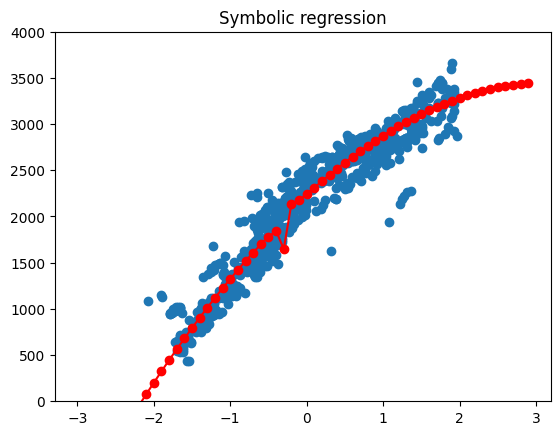

In [64]:
y_plt = sr.predict(X_plt)

plt.scatter(X[:, 0], y) 
plt.plot(X_plt, y_plt, 'ro-') 
plt.ylim(0, 4000)
plt.title("Symbolic regression")
plt.show()

In [65]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(root_mean_squared_error(y, y_pred), r2_score(y, y_pred))

98.68523801851431 0.9826828566583068


----

&copy; 2025 Matt Hall | [https://github.com/kwinkunks](https://github.com/kwinkunks) | MIT licence